# Selecting a location for the well

### Loading and preparing data

In [1]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np




In [2]:
try:
    data_0 = pd.read_csv('geo_data_0.csv')
    data_1 = pd.read_csv('geo_data_1.csv')
    data_2 = pd.read_csv('geo_data_2.csv')
    
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
    
    

In [3]:
data_list = [data_0, data_1, data_2]
data_list_name = ['data_0', 'data_1', 'data_2']

for data in data_list:
    display(data.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
for data in data_list:
    data.info()
    display(data.describe())
    print('-------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


-------------------------------------------------


- Check for duplicates:

In [5]:
for data , data_name in zip(data_list , data_list_name) :
    print('Number of duplicates in ' + data_name + ':', data.duplicated().sum())

Number of duplicates in data_0: 0
Number of duplicates in data_1: 0
Number of duplicates in data_2: 0


There are no fully duplicated lines
- Now let's check if there are duplicates in well IDs: :

In [6]:
for data , data_name in zip(data_list , data_list_name) :
    print('Number of duplicate IDs  ' + data_name + ':', data['id'].duplicated().sum())

Number of duplicate IDs  data_0: 10
Number of duplicate IDs  data_1: 4
Number of duplicate IDs  data_2: 4


A little, but there is.
Delete the lines where the well IDs are duplicated:

In [7]:
for data , data_name in zip(data_list , data_list_name) :
    data.drop_duplicates('id', inplace = True)
    print('Number of duplicate IDs  ' + data_name + ':', data['id'].duplicated().sum())
    print('Number of rows after removing duplicates ' + data_name + ':', len(data) )

Number of duplicate IDs  data_0: 0
Number of rows after removing duplicates data_0: 99990
Number of duplicate IDs  data_1: 0
Number of rows after removing duplicates data_1: 99996
Number of duplicate IDs  data_2: 0
Number of rows after removing duplicates data_2: 99996


- Remove the ID column since it is not needed for training model

In [8]:
for data , data_name in zip(data_list , data_list_name) : 
    data.drop(['id'], axis = 1, inplace = True)
    display(data.head())




,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


- Check the correlation of features in the tables

In [9]:
for data , data_name in zip(data_list , data_list_name) : 
    print(data_name + ':')
    display(data.corr())

data_0:


,f0,f1,f2,product
f0,1.000000,-0.440717,-0.003211,0.143504
f1,-0.440717,1.000000,0.001764,-0.192351
f2,-0.003211,0.001764,1.000000,0.483631
product,0.143504,-0.192351,0.483631,1.000000


data_1:


,f0,f1,f2,product
f0,1.000000,0.182279,-0.001810,-0.030523
f1,0.182279,1.000000,-0.002594,-0.010154
f2,-0.001810,-0.002594,1.000000,0.999397
product,-0.030523,-0.010154,0.999397,1.000000


data_2:


,f0,f1,f2,product
f0,1.000000,0.000506,-0.000452,-0.001978
f1,0.000506,1.000000,0.000753,-0.001055
f2,-0.000452,0.000753,1.000000,0.445867
product,-0.001978,-0.001055,0.445867,1.000000


We can notice that of all the features, the influence of f2 on the product is the most pronounced. And in data_1, the correlation between them is generally almost 1. 
- Let's build scatterplots and look at the dependence of the target feature:

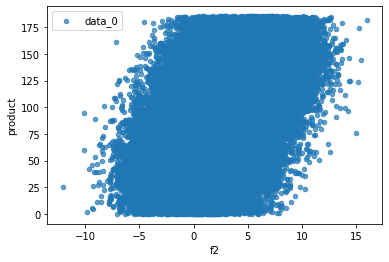

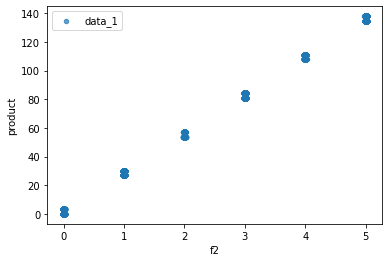

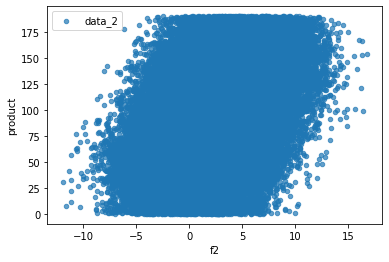

In [10]:
for data , data_name in zip(data_list , data_list_name) : 
    data.plot(kind = 'scatter' , x = 'f2', y = 'product', alpha = 0.7, label = data_name)

In data_1 linear dependency . So there are a lot of duplicate values. Let's check it out.

In [11]:
data_1['product'].value_counts().to_frame()

,product
53.906522,8472
26.953261,8468
84.038886,8430
57.085625,8389
3.179103,8337
80.859783,8320
30.132364,8306
110.992147,8303
134.766305,8303
0.000000,8235


We see that there are only 12 unique values in the product column, and 8235 of them are only zero.

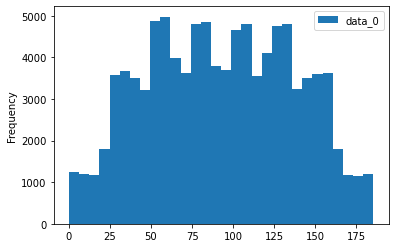

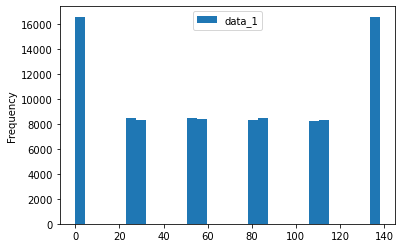

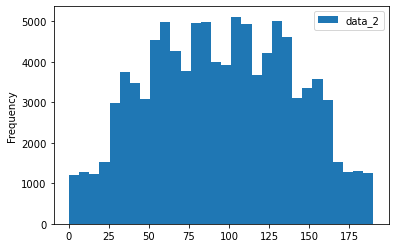

In [12]:
for data , data_name in zip(data_list , data_list_name) : 
    data.plot(kind = 'hist', bins = 30, y = 'product', label = data_name)



From the histograms, we can see that data_0 and data_2 look quite normal, and in data_1 the distribution is not normal, because there are few unique values.

## Train and validate the model

In [13]:
target_0 = data_0['product']
features_0 = data_0.drop(['product'], axis = 1)

target_1 = data_1['product']
features_1 = data_1.drop(['product'], axis = 1)

target_2 = data_2['product']
features_2 = data_2.drop(['product'], axis = 1)

- Using the function, we divide all three datasets into training and validation

In [14]:
def split(target, features):
    features_train , features_valid, target_train, target_valid = train_test_split(features, target,
                                                                                  test_size = 0.25, random_state = 12345)
    return features_train , features_valid, target_train, target_valid

features_train_0 , features_valid_0, target_train_0, target_valid_0 = split(target_0, features_0)
features_train_1 , features_valid_1, target_train_1, target_valid_1 = split(target_1, features_1)
features_train_2 , features_valid_2, target_train_2, target_valid_2 = split(target_2, features_2)

target_train_list = [target_train_0, target_train_1, target_train_2]
target_valid_list = [target_valid_0, target_valid_1, target_valid_2]

for target_train, target_valid in zip(target_train_list, target_valid_list):
    print(target_train.shape + target_valid.shape)
  

(74992, 24998)
(74997, 24999)
(74997, 24999)


- Let's create a function that trains a linear regression model, makes a prediction on the validation set, as well as the average inventory and RMSE.

In [15]:
def model_pred(features_train , features_valid, target_train, target_valid) :
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    prediction_mean = predictions.mean()
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    return predictions ,prediction_mean, rmse

In [16]:
predictions_0 ,prediction_mean_0, rmse_0 = model_pred(features_train_0 , features_valid_0, target_train_0, target_valid_0)

print('Average predictor for data_0: {:.2f}'.format(prediction_mean_0))
print('RMSE : {:.2f}'.format(rmse_0))

Average predictor for data_0: 92.79
RMSE : 37.85


In [17]:
predictions_1 ,prediction_mean_1, rmse_1 = model_pred(features_train_1 , features_valid_1, target_train_1, target_valid_1)

print('Average predictor for data_1: {:.2f}'.format(prediction_mean_1))
print('RMSE: {:.2f}'.format(rmse_1))

Average predictor for data_1: 69.18
RMSE: 0.89


In [18]:
predictions_2 ,prediction_mean_2, rmse_2 = model_pred(features_train_2 , features_valid_2, target_train_2, target_valid_2)

print('Average predictor for data_2: {:.2f}'.format(prediction_mean_2))
print('RMSE: {:.2f}'.format(rmse_2))

Average predictor for data_2: 94.87
RMSE: 40.08


### Conclusion :
The average predictor of raw materials in the well in data_1 69.18 is much less than in the rest. But RMSE data_1 is the best of all - 0.89 , which means that the model will be the least mistaken, unlike other regions where RMSE is around 40. So far, data_1 is the most unattractive because it has a small average predictor, but on the other hand, the risk of making mistakes is not great.
 

## Preparing for Profit Calculation

In [19]:
# 500 wells in exploration
wells_total = 500

# 200 best wells
wells_best = 200

# the entire budget
total_budget = 10000000

# profit per barrel
product_income = 450

# budget per well
well_budget = total_budget / wells_best

# minimum production from one well
min_well = well_budget / product_income

# minimum production of the region

min_income_region = wells_best * min_well


print('Budget per well :', well_budget, 'thousand roubles')
print('Minimum production from one well : {:.2f}'.format(min_well), 'thousand barrels')
print('The minimum production of the region : {:.2f}'.format(min_income_region), 'thousand barrels')




Budget per well : 50000.0 thousand roubles
Minimum production from one well : 111.11 thousand barrels
The minimum production of the region : 22222.22 thousand barrels


For a well to breakeven it needs to produce 111 thousand barrels, which is more than the average reserve of all regions. But in the regions there are both good and bad wells, you need to choose the best 200.

#### Let's write a function for calculating profit:

In [20]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending = False)
    selected = target[probs_sorted.index][:count]
    income_top = product_income * selected.sum()
    return income_top - total_budget

## Profit and Risk Calculation

In [21]:
def bootstrap(target, predictions):
    
    state = np.random.RandomState(12345)
    bootstrap_sample = 1000
    count = 0
    values = []
    target = target.reset_index(drop = True)
    
    for i in range(bootstrap_sample):
        target_subsample = target.sample(n = 500, replace = True , random_state = state)
        probs_subsample = pd.Series(predictions)[target_subsample.index]
        income = revenue(target_subsample, probs_subsample, 200)
        
        if income < 0 :       # loss well counter
            count += 1 
            
        values.append(income)
        
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    income_mean = values.mean()
    risk = (count / bootstrap_sample) 
    return lower, upper, income_mean, risk

In [22]:

lower_0, upper_0, income_mean_0, risk_0 = bootstrap(target_valid_0, predictions_0)
lower_1, upper_1, income_mean_1, risk_1 = bootstrap(target_valid_1, predictions_1)
lower_2, upper_2, income_mean_2, risk_2 = bootstrap(target_valid_2, predictions_2)


In [23]:
print('Lower spacing in data_0: {:.2f}'.format(lower_0))
print('Upper interval in data_0: {:.2f}'.format(upper_0))
print('Mean profit in data_0: {:.2f}'.format(income_mean_0))
print('Risk of loss in data_0: {:.1%}'.format(risk_0))
print()
print('Lower spacing in data_1: {:.2f}'.format(lower_1))
print('Upper interval in data_1: {:.2f}'.format(upper_1))
print('Mean profit in data_1: {:.2f}'.format(income_mean_1))
print('Risk of loss in data_1: {:.1%}'.format(risk_1))
print()
print('Lower spacing in data_2: {:.2f}'.format(lower_2))
print('Upper interval in data_2: {:.2f}'.format(upper_2))
print('Mean profit in data_2: {:.2f}'.format(income_mean_2))
print('Risk of loss in data_2: {:.1%}'.format(risk_2))



Lower spacing in data_0: -131536.03
Upper interval in data_0: 944395.58
Mean profit in data_0: 409428.04
Risk of loss in data_0: 7.1%

Lower spacing in data_1: 114527.90
Upper interval in data_1: 970787.91
Mean profit in data_1: 536902.59
Risk of loss in data_1: 0.9%

Lower spacing in data_2: -159194.03
Upper interval in data_2: 875652.50
Mean profit in data_2: 353790.36
Risk of loss in data_2: 10.2%


# Conclusion :
The results showed that the best average profit in data_1 (536.9 million rubles) with a probability of 95% will be in the range from 114.5 to 970.8 million rubles. The risk of loss is the smallest - 0.9%. In the data_0 and data_2 regions, the profit is lower (409.4 and 353.8 million rubles) and the risks are much higher (7.1 and 10.2%).

The most profitable for development is data_1.